## Exercise: Linear regression minimizing $\ell_1$-error

<font color='blue'><b>Goal:</b></font>
Solve linear regression with an $\ell_1$-error function using a linear program.

<font color='blue'><b>Additional resources:</b></font> 
For an introduction on regression, see https://stat.ethz.ch/education/semesters/ss2016/regression/Regression.pdf.

---

A researcher would like to know if a child's height $H$ (in cm) can be predicted by their age $A$ (in years).
In other words, she would like to know if there is any relationship between $A$ and $H$.
She begins by observing the age and height of fifteen children. 
Her data is stored below (the first child was age 1 with height 73.2, the second child was age 1 with height 73.3, etc.).

In [1]:
# Observed ages in years
obs_age = [1,1,2,2,3,4,4,5,6,7,7,8,9,9,10]

# Observed heights in cm
obs_ht = [73.2,73.3,75.1,77.4,80.1,85.7,84.0,89.1,100.2,105.3,112.2,115.0,125.1,135.2,150.7]

We can visualize this data using the `matplotlib` library in Python.
The `plt.scatter` plots the individual data points. 

We can also draw different lines through the data to visualize a linear relationship. 

<font color='red'><b>Note:</b></font> There are many ways to plot a line in `matplotlib`. 
One method involves using the `numpy` Python package.

Run the following code to plot the data and to draw the lines $H = 7A+65$ and $H = 5.75A+70$.

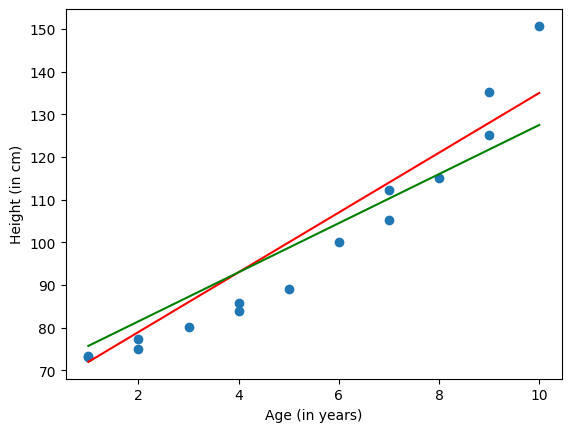

In [2]:
# Import Python's plotting tools (matplotlib) and math tools (numpy)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plot the points
plt.scatter(obs_age,obs_ht)

# Draw the line H = 7A+65
A = np.linspace(1,10,100)
H = 7*A+65
plt.plot(A, H, color = 'red')

# Draw the line H = 5.75A+70
H = 5.75*A+70
plt.plot(A, H, color = 'green')


plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()

Both lines $H = 7A + 65$ and $H = 5.75A + 70$ seem to capture some of the correlation between `obs_ages` and `obs_ht`.
However, which line is the better choice?
Regression measures this with a loss function. 

Given values $\alpha, \beta \in \mathbb{R}$, we say that the $\ell_1$-error of the line $H = \beta A + \alpha$ is equal to 
$$
\displaystyle \sum_{i=1}^{15} |\text{obsht}_{~i} - (\beta \times \text{obsage}_{~i} + \alpha)|.
$$

The line $H = 7A + 65$ has an $\ell_1$ error of $90.19$, and the line $H = 5.75A + 70$ has an $\ell_1$ error of $100.80$.

<font color="blue"><b>Your first task:</b></font> 
Write an LP that finds parameters $\alpha$ and $\beta$ so that the line $H = \beta A + \alpha$ minimizes the $\ell_1$-error.<br>
Implement this LP and solve it. Also, plot the optimal line $H$ that you found together with the data.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ssuemer/Desktop/ETH/FS24/lin_comb_opt/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/335ae77c24c04e5790c98ad03f321940-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/335ae77c24c04e5790c98ad03f321940-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 35 COLUMNS
At line 141 RHS
At line 172 BOUNDS
At line 190 ENDATA
Problem MODEL has 30 rows, 17 columns and 90 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 30 (0) rows, 17 (0) columns and 90 (0) elements
Perturbing problem by 0.001% of 3.1622777 - largest nonzero change 0 ( 0%) - largest zero change 0
0  Obj 0 Primal inf 723.47085 (15) Dual inf 0.32528093 (15) w.o. free dual inf (0)
24  Obj 73.414286
Optimal - objective value 73.414286
Optimal objective 73.41428571 - 24 iterations time 0.002
Option for printingOpt

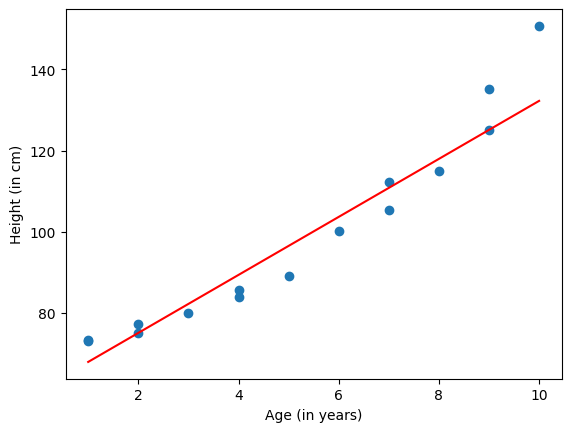

In [11]:
# Solve the L-1 linear regression problem here...
from pulp import *

# Create empty LP
my_LP = LpProblem("l1_regression", LpMinimize)

# Get number of observations
n = len(obs_age)

# Create z variables
zs = [LpVariable(f"z{i}") for i in range(n)]

# Create LP variable for each parameter to tune
alph = LpVariable("alpha")
bet = LpVariable("beta")

# Objective function
my_LP += lpSum(zs)

# Lower bound all zis by the respective absolute errors
for i in range(n):
  abs_arg = obs_ht[i] - (alph + bet * obs_age[i])
  my_LP += zs[i] >= abs_arg
  my_LP += zs[i] >= -abs_arg

my_LP.solve()

# Plot the points
plt.scatter(obs_age,obs_ht)

A = np.linspace(1,10,100)
H = bet.value()*A + alph.value()
plt.plot(A, H, color = 'red')

plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()


Perhaps the relationship between age and height is not linear.
In fact the data in the previous plot seems to suggest that the relationship is more quadratic. 
We can also use linear programming to solve this quadratic regression problem!

Given values $\alpha_0, \alpha_1, \alpha_2 \in \mathbb{R}$, we say that the $\ell_1$-error of the quadratic function $H = \alpha_2 A^2 + \alpha_1 A + \alpha_0$ is equal to 
$$
\displaystyle \sum_{i=1}^{15} |\text{obsht}_{~i} - (\alpha_2 \times \text{obsage}_{~i}^2 + \alpha_1 \times \text{obsage}_{~i} + \alpha_0)|.
$$

<font color="blue"><b>Your second task:</b></font> 
Write an LP that finds parameters $\alpha_0$, $\alpha_1$ and $\alpha_2$ so that the quadratic function $H = \alpha_2 A^2 + \alpha_1 A + \alpha_0$ minimizes the $\ell_1$-error.<br>
Implement this LP and solve it. Also, plot the optimal curve $H$ that you found together with the data.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ssuemer/Desktop/ETH/FS24/lin_comb_opt/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/d75cb8ea5717430cbd9ace7c945c0ae8-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/d75cb8ea5717430cbd9ace7c945c0ae8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 35 COLUMNS
At line 171 RHS
At line 202 BOUNDS
At line 221 ENDATA
Problem MODEL has 30 rows, 18 columns and 120 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 30 (0) rows, 18 (0) columns and 120 (0) elements
Perturbing problem by 0.001% of 10 - largest nonzero change 0 ( 0%) - largest zero change 0
0  Obj 0 Primal inf 415.83365 (15) Dual inf 0.7799985 (15) w.o. free dual inf (0)
23  Obj 32.371429
23  Obj 8.5714286e+10 Primal inf 1.8460884e+11 (7) Dual inf 1.4072143e+14 (11) w.o. free dual inf (9)
27  Obj 31.841667
O

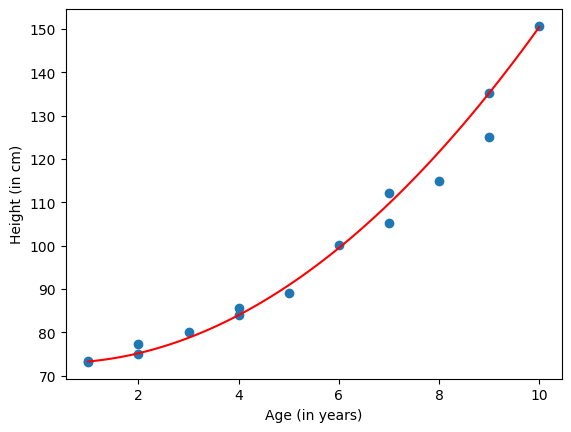

In [12]:
# Solve the L-1 quadratic regression problem here...

# Create empty LP
quad_LP = LpProblem("l1_regression_quad", LpMinimize)

# Get number of observations
n = len(obs_age)

# Create z variables
zs = [LpVariable(f"z{i}") for i in range(n)]

# Create LP variable for each parameter to tune
alphs = [LpVariable(f"alph{i}") for i in range(3)]

# Objective function
quad_LP += lpSum(zs)

# Lower bound all zis by the respective absolute errors
for i in range(n):
  abs_arg = obs_ht[i] - (alphs[0] + alphs[1] * obs_age[i] + alphs[2] * obs_age[i] * obs_age[i])
  quad_LP += zs[i] >= abs_arg
  quad_LP += zs[i] >= -abs_arg

quad_LP.solve()

# Plot the points
plt.scatter(obs_age,obs_ht)

A = np.linspace(1,10,100)
H = alphs[0].value() + alphs[1].value() * A  + alphs[2].value() * (A * A)
plt.plot(A, H, color = 'red')

plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()
